<a class="anchor" id="top_"></a>

## Some CAHC Explorations
- [Moon Longitude and Longitude Diff by sidereal cycle](#m_l_ld)
- [Moon Longitude by sidereal cycle](#m_l)
- [Interpolate the time series mdf](#Interpolate_MDF)
- [Nakshatras Meta Data](#Nakshatras_Meta_Data)
- [Moon Dwell Time by Nakshatra](#Moon_Dwell_Time_by_Nakshatra)
- [Explore longitude diff at Full Moon between Moon and other Gruhas](#ld_m_g)
- [Explore Relation of Full Moon to Maasa Names](#fm_mn)
- [Mars and Moon Parvas](#Mars_and_Moon_Parvas)

[top](#top_)

In [1]:
### Explore Moon, Sun, Gruha - Lat Lon Phase 
import NasaMoonScrapeUtils as nmsu
import PlanetPos
import JdUtils
import NaksUtils
import SCPUtils
import numpy as np
import pandas as pd
import re
from time import time, sleep
import datetime
import matplotlib.pyplot as plt
from matplotlib import patches
import math 


import seaborn as sns
import swifter
from time import time

from IPython.display import display
from IPython.display import HTML

pd.set_option('display.float_format', '{:.2f}'.format)


In [2]:

class TimeKeeper(object):
	def __init__(self):
		self.start_time = time()
		self.last_time = self.start_time
		self.elapsed_time = [0,0]

	def elapsed(self):
		now = time()
		self.elapsed_time[0] = now - self.last_time
		self.elapsed_time[1] = now - self.start_time
		self.last_time = now
		return self

	def __str__(self):
		et = self.elapsed_time
		return f"{et[0]:.2f}s, {et[1]:.2f}"

	def test():
		tk = TimeKeeper()
		for i in range(10):
			print(tk.elapsed())
			sleep(.5)

# TimeKeeper.test()
# flatten = lambda l: [item for sublist in l for item in sublist]


### Moon Longitude and Longitude Diff by sidereal cycle <a class="anchor" id="m_l_ld"></a> 
- For about a year moon longitude and longitude diff plotted every 4 hours
- Purpose is to spot patterns in rate of longitude change over the course of multiple sidereal cycles.

[top](#top_)

loaded ../datasets/sun_moon_pos_-1000-01-01_for_100_years_in_0.167_jd_steps.csv


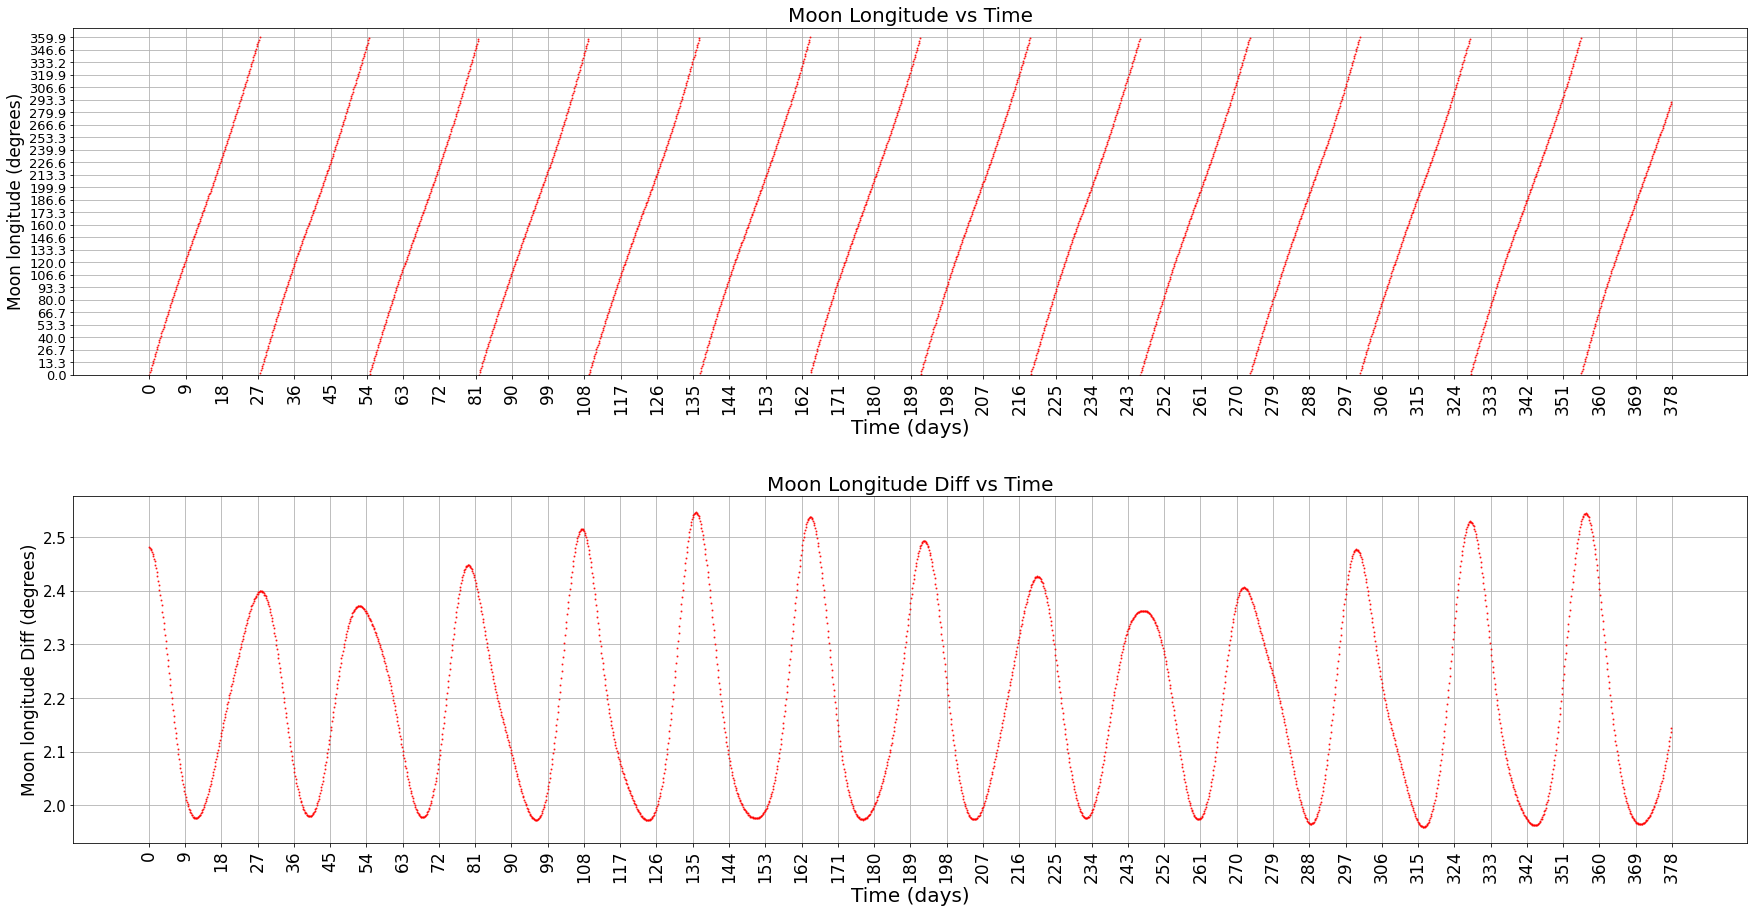

In [3]:
# import matplotlib.pyplot as plt
su = SCPUtils.SCPUtils()
mdf = su.mdf.copy()
# mdf.elati_Moon = [ m %360 for m in mdf.elati_Moon]
mdf.elong_Moon = [ m %360 for m in mdf.elong_Moon]
zero_moons = mdf[mdf.elong_Moon <= 0.01]
zero_moon_longs= pd.Series(zero_moons.index.values)

# zero_moon_longs.diff().plot( marker='o', alpha=0.8, figsize=(24,5))
fig, ax = plt.subplots(2,1, figsize=(24,10))
fig.subplots_adjust(hspace=.35)
colors = ['r', 'g', 'b']
for i  in range(1) : #len(zero_moon_longs)):
    lon = zero_moon_longs.iloc[i]
    plotdf = mdf.loc[lon:, ['elong_Moon']].iloc[0:27*6*14]
    # display(plotdf.head())
    plotdf.plot(kind='line', alpha=0.8, figsize=(30,15), marker='o', lw=0, label=f'{lon}', color=colors[i % len(colors)], markersize=1, ax=ax[0], grid=True, secondary_y=False, legend=not True)
    
    ax[0].set_xlabel('Time (days)', fontsize=20)
    xs = plotdf.index.values
    xticks = np.arange(xs[0], xs[-1]+1, (xs[-1]-xs[0])//40)
    xlabels = [int(x) for x in (xticks -xticks[0])]
    ax[0].set_xticks(xticks)
    ax[0].set_xticklabels(xlabels, rotation=90, fontsize=17)

    ax[0].set_ylabel('Moon longitude (degrees)', fontsize=17)
    ys = np.arange(0,370, 13.33)
    yticks = ys
    ylabels = [f"{y:.1f}" for y in yticks]
    ax[0].set_ylim(0,370)
    ax[0].set_yticks(yticks)
    ax[0].set_yticklabels(ylabels, rotation=0, fontsize=13)

    ax[0].set_title('Moon Longitude vs Time', fontsize=20)
    # ax[0].grid(True)

    # plt.show()
    plotdf.diff().apply(lambda x: x%360).plot(kind='line', alpha=0.8, figsize=(30,15), marker='o', lw=0, label=f'{lon}', color=colors[i % len(colors)], markersize=1, ax=ax[1], legend=False, grid=True, secondary_y= not True)
    ax1=ax[1]
    ax1.set_xlabel('Time (days)', fontsize=20)
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xlabels, rotation=90, fontsize=17)

    ax1.set_ylabel('Moon longitude Diff (degrees)', fontsize=17)
    ax1.set_yticklabels( [ f"{y:.1f}" for y in ax[1].get_yticks()], rotation=0, fontsize=15)

    ax1.set_title('Moon Longitude Diff vs Time', fontsize=20)
    # plt.show()
    # mdf.loc[i:, 'elong_Moon'].iloc[0:30*4].plot(kind='line', alpha=0.8, figsize=(10,5), ax=ax, marker='o')


### Moon Longitude by sidereal cycle <a class="anchor" id="m_l"></a>
- Polar plot of moon's longitude (theta) vs. earth-moon distance (r)
- First plot is for about an year 
- Second plot is for about a year but starting a 2.5 years later
- Third plot is for about 5 years
- All plots show poornima and amavasya
- Purpose is to see if the parvas show any affinity to certain longitudes ( nakshatras)

[top](#top_)

loaded ../datasets/sun_moon_pos_-1000-01-01_for_100_years_in_0.167_jd_steps.csv


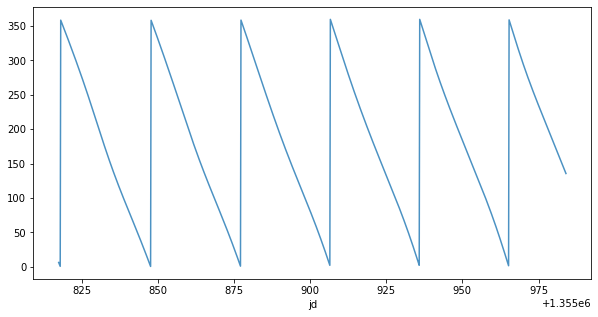

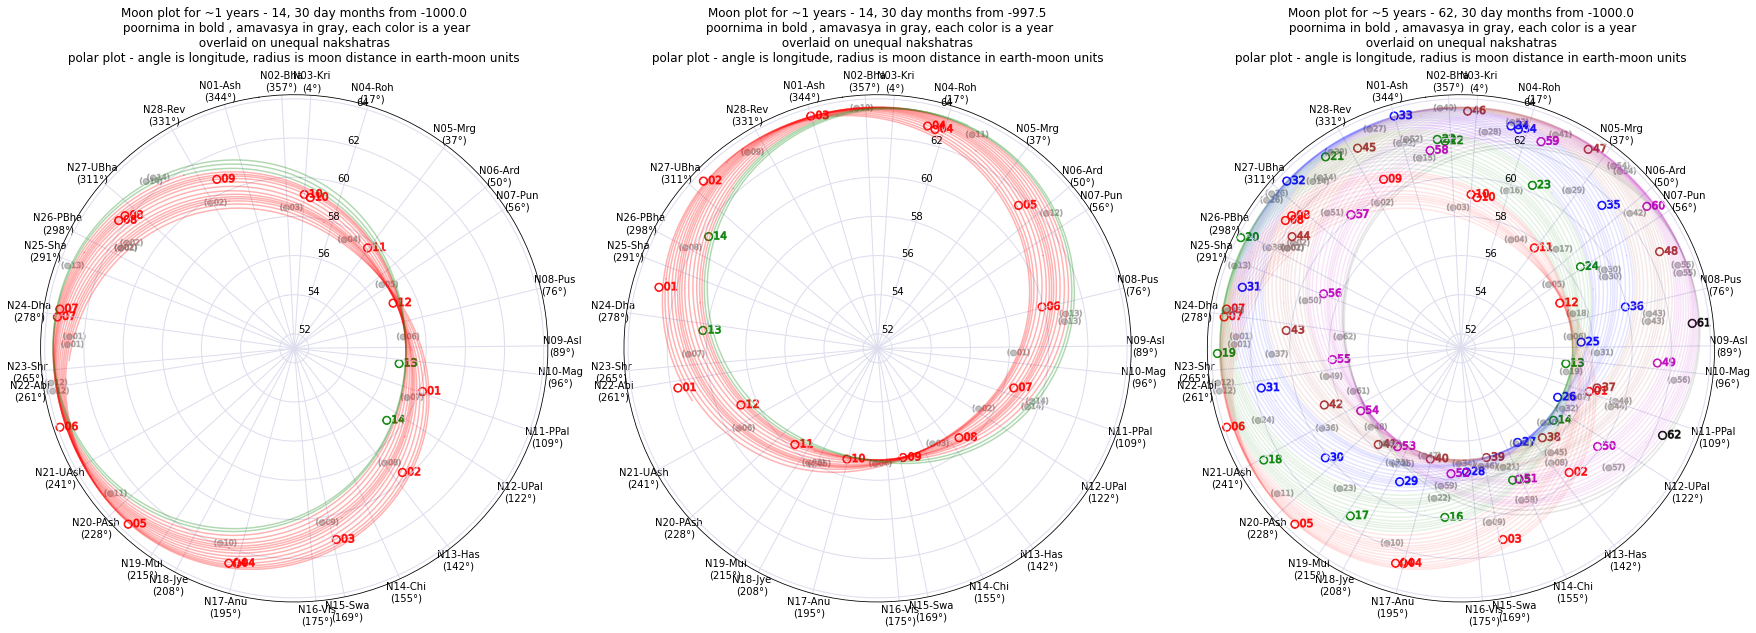

In [4]:
su = SCPUtils.SCPUtils()
su.mdf.iloc[:1000].sun_moon_angle.plot(kind='line', alpha=0.8, figsize=(10,5))
fig = plt.figure(figsize=(30,10))
fig.subplots_adjust(wspace=.15)
ax1 = fig.add_subplot(131, polar=True)
ax2 = fig.add_subplot(132, polar=True)
ax3 = fig.add_subplot(133, polar=True)

su.plot_moon_cycle(num_years=1, ax=ax1)
su.plot_moon_cycle(num_years=1, offset_years=2.5, ax=ax2)
su.plot_moon_cycle(num_years=5, ax=ax3)
plt.show()


#### Interpolate the time series - add 2 additional equally spaced points  between two 6 hour observation <a class="anchor" id="Interpolate_MDF"></a>
[top](#top_)

In [5]:
def interpolate_mdf(mdf, interpolate_span=4):
	xdf = mdf.reset_index()[['jd', 'elati_Moon', 'elong_Moon', 'r_Moon', 'elong_Sun', 'sun_moon_angle']].values
	acc = []
	start_time = time()
	for ix in range(len(xdf[:])-1) :
		if xdf[ix+1,2] > xdf[ix,2] :  #ensure elong_Moon is not transiting from 360 to 0 - to eliminate the spiky interpolation
			if xdf[ix+1,4] > xdf[ix,4] :  #ensure elong_Sun is not transiting from 360 to 0 - to eliminate the spiky interpolation
				# if xdf[ix+1,5] > xdf[ix,5] :  #ensure sun_moon_angle is not transiting from 360 to 0 - to eliminate the spiky interpolation
				_ans = np.linspace(xdf[ix], xdf[ix+1], interpolate_span)[:-1] # interpolate between two points and ignore the last point as it is the same as first point of next chunk
				acc.append(_ans)
		if ( ix%50000 == 0) : print (f"Interpolating ... {(time() - start_time):.2f} seconds - {ix} rows - {len(acc)} chunks ")

	print (f"Concatenating ... {(time() - start_time):.2f} seconds")
	flatten = lambda l: [item for sublist in l for item in sublist]
	ydf = pd.DataFrame(flatten(acc));
	# ydf = pd.concat([ pd.DataFrame(x) for x in acc[:]]);
	print (f"Done Concatenating ... {(time() - start_time):.2f} seconds")
	print (f"Projecting phase ... {(time() - start_time):.2f} seconds")
	ydf.columns = ['jd', 'elati_Moon', 'elong_Moon', 'r_Moon', 'elong_Sun', 'sun_moon_angle']
	ydf['phase_Moon'] = ydf.swifter.apply(lambda x: x.elong_Moon-x.elong_Sun, axis=1)
	ydf.phase_Moon =  ydf.phase_Moon.swifter.apply(lambda x: x-360 if x>180 else x+360 if x<-180 else x )
	ydf.drop ( columns=['sun_moon_angle'], inplace=True)
	ts0= ydf.jd.min()
	ydf['ts'] = ydf.swifter.apply(lambda x: x.jd-ts0, axis=1)
	ydf = ydf.set_index('jd')
	print (f"Done Projecting phase ... {(time() - start_time):.2f} seconds")
	return ydf
	# jd_step = f"{pd.Series(ydf.index).diff().mean():0.3f}"
	# fn = f"../datasets/sun_moon_pos_-1000-01-01_for_100_years_in_{jd_step}_jd_steps.csv"
	# ydf.to_csv("../datasets/sun_moon_pos_-1000-01-01_for_100_years_in_0.056_jd_steps.csv")
	# f"Saved {fn}" 


mdf_interpolated = interpolate_mdf(mdf)
nyears = (mdf_interpolated.iloc[[0,-1],].reset_index().jd.diff()/365.25).values[-1]
mdf_interpolated.head(30).reset_index().style.set_precision(2).set_caption(
	f"<h3>{nyears:.0f} years of Moon Lat Long and Phase - " 
	f"30 of {mdf_interpolated.shape[0]:,} rows <h4>between two consecutive readings 6 hours apart<br>interpolated with 2 additional points equally spaced</h4></h3>"
)

Interpolating ... 0.00 seconds - 0 rows - 1 chunks 
Interpolating ... 2.35 seconds - 50000 rows - 49674 chunks 
Interpolating ... 6.73 seconds - 100000 rows - 99347 chunks 
Interpolating ... 8.51 seconds - 150000 rows - 149019 chunks 
Interpolating ... 10.32 seconds - 200000 rows - 198691 chunks 
Concatenating ... 11.03 seconds
Done Concatenating ... 13.85 seconds
Projecting phase ... 13.85 seconds


Pandas Apply: 100%|██████████| 652695/652695 [00:00<00:00, 688442.50it/s]


Done Projecting phase ... 14.98 seconds


,jd,elati_Moon,elong_Moon,r_Moon,elong_Sun,phase_Moon,ts
0,1355817.50,4.99,274.97,62.77,281.12,-6.15,0.00
1,1355817.56,4.99,275.65,62.74,281.17,-5.52,0.06
2,1355817.61,4.99,276.33,62.72,281.23,-4.90,0.11
3,1355817.67,4.99,277.01,62.69,281.28,-4.27,0.17
4,1355817.72,4.99,277.70,62.66,281.34,-3.64,0.22
5,1355817.78,4.99,278.38,62.63,281.40,-3.02,0.28
6,1355817.83,4.99,279.06,62.60,281.45,-2.39,0.33
7,1355817.89,4.99,279.75,62.58,281.51,-1.76,0.39
8,1355817.94,4.98,280.43,62.55,281.56,-1.13,0.44
9,1355818.00,4.98,281.12,62.52,281.62,-0.50,0.50


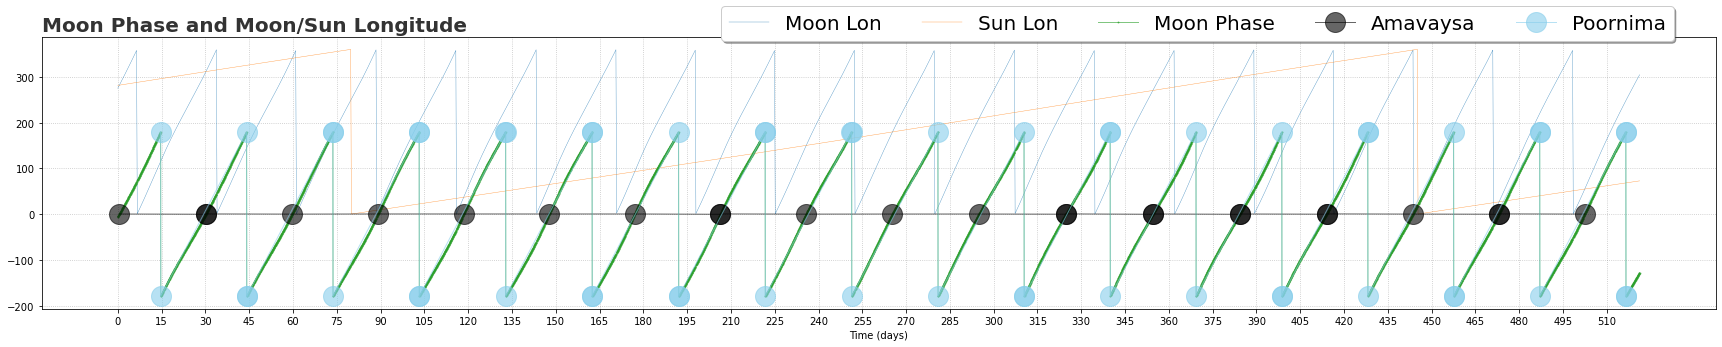

In [6]:
def plot_moon_phase() :
	zz = mdf_interpolated.iloc[20*0:20*(466)].reset_index().set_index('ts').drop(columns=['elati_Moon', 'jd', 'r_Moon'])#.swifter.apply(lambda x: x.elong_Moon-x.elong_Sun, axis=1)
	ax = zz[['elong_Moon', 'elong_Sun']].plot( figsize=(30,5), markersize=0, lw=.4, alpha=.8 )
	zz[['phase_Moon',]].plot( figsize=(30,5), marker='o', markersize=1, lw=1, alpha=.6, ax=ax) 
	ax.grid(True)
	zz[['phase_Moon',]][zz.phase_Moon.swifter.apply(lambda x: abs(x)<.5)].plot( figsize=(30,5), marker='o', markersize=20, lw=1, alpha=.6, ax=ax, legend=False, color='black')
	zz[['phase_Moon',]][zz.phase_Moon.swifter.apply(lambda x: (180-abs(x))<1)].plot( figsize=(30,5), marker='o', markersize=20, lw=1, alpha=.6, ax=ax, legend=False, color='skyblue')
	ax.grid(True, which='major', axis='both', linestyle=':', color='grey', alpha=.5)
	# ax.set_facecolor('#f2f2f2')
	ax.set_xlabel("Time (days)")
	ax.set_xticks(np.arange(0, zz.index.max(), 15))
	ax.legend(['Moon Lon', 'Sun Lon', 'Moon Phase', 'Amavaysa', 'Poornima'], loc='upper left', bbox_to_anchor=(.4, 1.15) , fancybox=True, shadow=True, ncol=5, fontsize=20)
	ax.set_title("Moon Phase and Moon/Sun Longitude", fontsize=20, fontweight='bold', color='black', alpha=.8, loc='left')

plot_moon_phase()

### Nakshatras Meta Data <a class="anchor" id="Nakshatras_Meta_Data"></a> 
[top](#top_)

In [7]:
save_col = pd.get_option('display.max_columns')
nu = NaksUtils.NaksUtils()
df28_ = nu.df28_good.copy().drop(columns='scp_lon_next')
pd.set_option('display.max_columns', None)
df28_.columns = [x.replace('_', ' ') for x in df28_.columns]
display(df28_.style.set_precision(1).set_caption("<h2>Nakshatras Meta Data</h2>"))
pd.set_option('display.max_columns', save_col)


,nnid,nid,naks,enaks,daivata,marga,veethi,shape,vgj cnt,vgj stars,proxy,sname,hip,abh stars,lon eq,lon ue,scp muhurta,scp lon,proxy lon 0445 bce,proxy lat 0445 bce,proxy lon 1479 bce,proxy lat 1479 bce
0,1,N01-Ash,अश्विनी,Aśvayuk,Aśvini,Madhyama,Go,Horseneck,3,"(α,β,γ) Ari",β Ari,Sheratan,HIP 8903,β Ari,0.0,0.0,30.0,351.7,0.0,8.4,345.7,8.4
1,2,N02-Bha,भरणी,Bharaṇī,Yama,Uttara,Naga,Bhaga (Perineum),3,"(35,39,41) Ari",* 41 Ari,Bharani,HIP 13209,41 Ari,13.3,13.3,15.0,4.8,14.3,10.3,0.0,10.2
2,3,N03-Kri,क्रित्तिका,Kṛttikā,Agni,Uttara,Naga,Knife/Cleaver,6,"(17,19,20,23,27,η) Tau",η Tau,Alcyone,HIP 17702,η Tau,26.7,20.0,30.0,11.4,26.0,3.8,11.8,3.7
3,4,N04-Roh,रोहिणी,Rohiṇī,Prajāpati,Uttara,Gaja,Cart,5,"(α,γ,λ) Ori",α Tau,Aldebaran,HIP 21421,α Tau,40.0,33.3,45.0,24.6,35.8,-5.6,21.5,-5.7
4,5,N05-Mrg,मृगशीर्ष,Mṛgaśira,Soma,Uttara,Gaja,Deer’s Head,3,(γ) Gem,λ Ori,Meissa(Heka),HIP 26207,λ Ori,53.3,53.3,30.0,44.4,49.7,-13.7,35.5,-13.8
5,6,N06-Ard,आर्द्रा,Ārdrā,Rudra,Uttara,Gaja,Bāhuḥ (Arm)/Red Dot,1,"(α,γ,δ1,ε,θ2) Tau",γ Gem,Alhena(Almeisan),HIP 31681,γ Gem,66.7,66.7,15.0,57.6,65.1,-7.0,50.9,-7.2
6,7,N07-Pun,पुनर्वसू,Punarvasu,Aditi,Uttara,Airavati,Balance,2,"(α,β) Gem",β Gem,Pollux,HIP 37826,β Gem,80.0,73.3,45.0,64.1,79.6,6.6,65.5,6.5
7,8,N08-Pus,पुष्य,Puṣya,Bṛhaspati,Uttara,Airavati,Śarāva (Pot-lid),1,(δ) Cnc,δ Cnc,Asellus Australis,HIP 42911,δ Cnc,93.3,93.3,30.0,83.9,94.7,-0.0,80.4,-0.1
8,9,N09-Asl,आश्लेषा,Āśleṣā,Sarpa,Uttara,Airavati,Snake Head/Flag,6,"(δ,ε,ζ,η,ρ,σ) Hya",ζ Hya,Minazal V,HIP 43813,ζ Hya,106.7,106.7,15.0,97.1,100.7,-11.2,86.5,-11.3
9,10,N10-Mag,मघा,Maghā,Pitṛ,Uttara,Airavati,Enclosure,6,"(α,γ1,ε,ζ,η,μ) Leo",ζ Leo,Adhafera,HIP 50335,α Leo,120.0,113.3,30.0,103.7,113.5,11.7,99.2,11.6


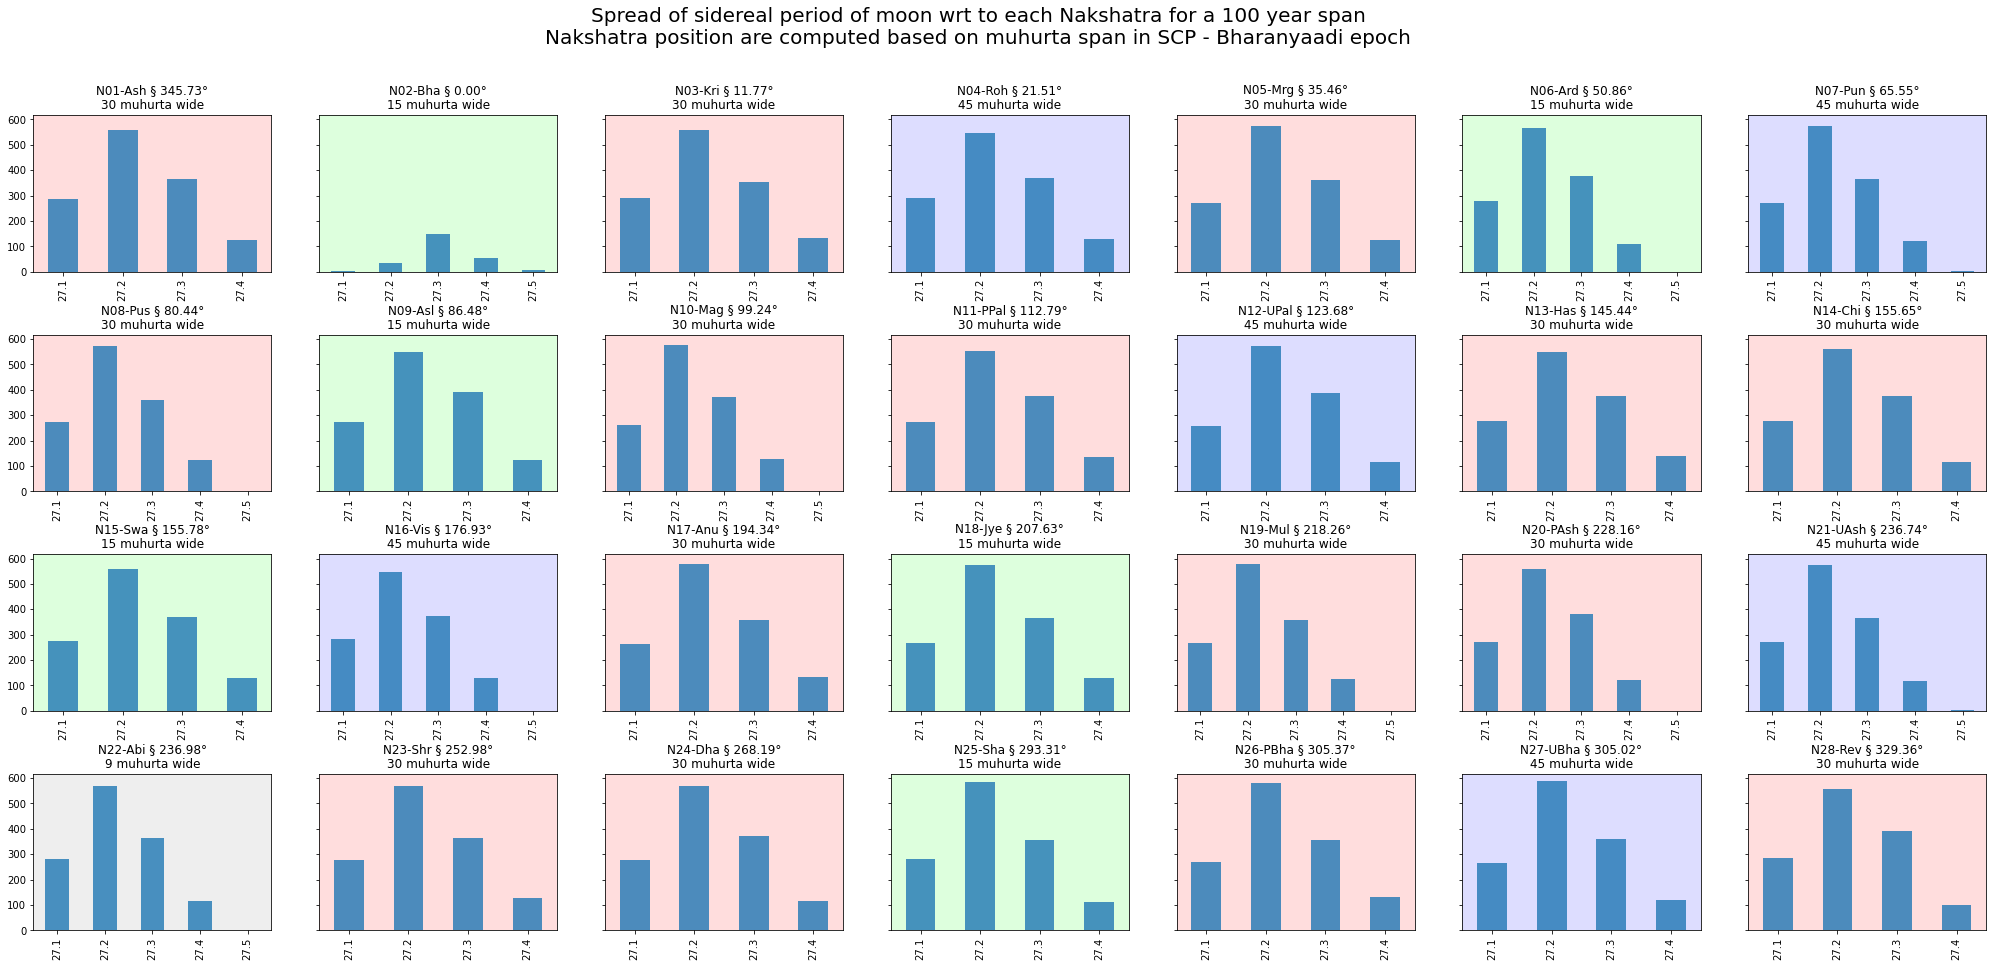

In [8]:
def  plot_sidereal_hist(mdf) :
	spread_ = mdf_interpolated.assign( ts_int= lambda x : np.round(x.ts,1) )
	fig, axs = plt.subplots(4,7, figsize=(35,15), sharex=not True, sharey=True, gridspec_kw={'hspace':.4, 'wspace': .2})
	axs = axs.flatten()
	fig.suptitle(f"Spread of sidereal period of moon wrt to each Nakshatra for a 100 year span\nNakshatra position are computed based on muhurta span in SCP - Bharanyaadi epoch", fontsize=20)

	n28_lon = nu.df28_good[['nid', 'proxy_lon_1479_bce', 'scp_muhurta']]

	for ix, nid, lon, muhurta in [  (ix, elem.nid , elem.proxy_lon_1479_bce, elem.scp_muhurta)  for ix , elem in n28_lon.iterrows() ] :
		spread = spread_
		spread = spread[ abs(spread.elong_Moon - lon) < 1].reset_index().groupby('ts_int').apply(lambda x: x.mean()).ts_int.diff()
		spread = pd.DataFrame(spread).sort_index().rename(columns={'ts_int':'ts_spread'})
		spread.ts_spread = spread.ts_spread.apply(lambda x: round(x,1))
		spread = spread[spread.ts_spread>1] #spread.values.sum() -spread[1]
		spread = spread[spread.ts_spread<30] #spread.values.sum() -spread[1]
		color = color='#ddddff' if muhurta==45 else '#ffdddd' if muhurta==30 else '#ddffdd' if muhurta==15 else '#eeeeee'
		axs[ix].set_facecolor(color)
		spread.ts_spread.value_counts().sort_index().plot(kind='bar', ax=axs[ix], title=f"Nakshatra {nid}", alpha=.8)
		# spread.ts_spread.hist(ax=axs[ix], color='red' if muhurta==45 else 'blue' if muhurta==30 else 'green' if muhurta==15 else 'pink')
		axs[ix].set_title(f"{nid} § {lon:0.2f}°\n{int(muhurta)} muhurta wide")
		# axs[ix].set_xticklabels(axs[ix].get_xticklabels(), rotation=0)
		# if ix > 8: break

plot_sidereal_hist(mdf_interpolated)
	


### Moon Dwell Time by Nakshatra <a class="anchor" id="Moon_Dwell_Time_by_Nakshatra"/>
[top](#top_)

In [9]:
def get_naks_spans ( df28, slice) :
	next_idx =  list(range(1,df28.shape[0])) + [0]
	prev_idx = [-1] + list(range(0,df28.shape[0]-1))
	lon = df28[slice]
	next_lon = lon.values[next_idx]
	prev_lon = lon.values[prev_idx]
	return pd.DataFrame({
		'nid':df28['nid'],
		'proxy':df28['proxy'],
		'scp_muhurta':df28['scp_muhurta'],
		'prev_lon':prev_lon,
		'lon':lon ,
		'next_lon':next_lon, 
	}).assign(
		left = lambda x:  (x.lon.apply( lambda e : 360 + lon.min() if e <= lon.min() else e) + x.prev_lon)/2,
		right = lambda x:  (x.next_lon.apply( lambda e : 360 + lon.min() if e <= lon.min() else e) + x.lon)/2,
		span = lambda x: (x.right - x.left)%360,
	)

proxy_span_0445_df = get_naks_spans(nu.df28_good, 'proxy_lon_0445_bce')
proxy_span_1479_df = get_naks_spans(nu.df28_good, 'proxy_lon_1479_bce')
scp_span_df = get_naks_spans(nu.df28_good, 'scp_lon')

# display(proxy_span_1479_df.style.set_precision(1).background_gradient(cmap='RdYlGn', subset=['span', 'scp_muhurta']))
# heading_properties = [('font-size', '20px')]
# cell_properties = [('font-size', '22px')]
# dfstyle = [dict(selector="th", props=heading_properties), dict(selector="td", props=cell_properties)]
# proxy_span_1479_df.drop(index=[13,]).corr().style.set_table_styles(dfstyle) \
# 	.background_gradient(cmap='RdYlGn').set_precision(1).set_caption("<h2>Correlation of SCP muhurta with Moon Dwell Muhurta - mean,std</h2>")

,lon,proxy,scpmuhurta,span,meandwellmuhurta,stddwellmuhurta
nid,,,,,,
N01-Ash,345.7,β Ari,30.0,15.3,34.9,2.9
N02-Bha,0.0,* 41 Ari,15.0,13.0,29.7,2.5
N03-Kri,11.8,η Tau,30.0,10.8,24.5,2.1
N04-Roh,21.5,α Tau,45.0,11.8,26.9,2.2
N05-Mrg,35.5,λ Ori,30.0,14.7,33.4,2.7
N06-Ard,50.9,γ Gem,15.0,15.0,34.2,2.8
N07-Pun,65.5,β Gem,45.0,14.8,33.6,2.7
N08-Pus,80.4,δ Cnc,30.0,10.5,23.8,2.0
N09-Asl,86.5,ζ Hya,15.0,9.4,21.3,1.9


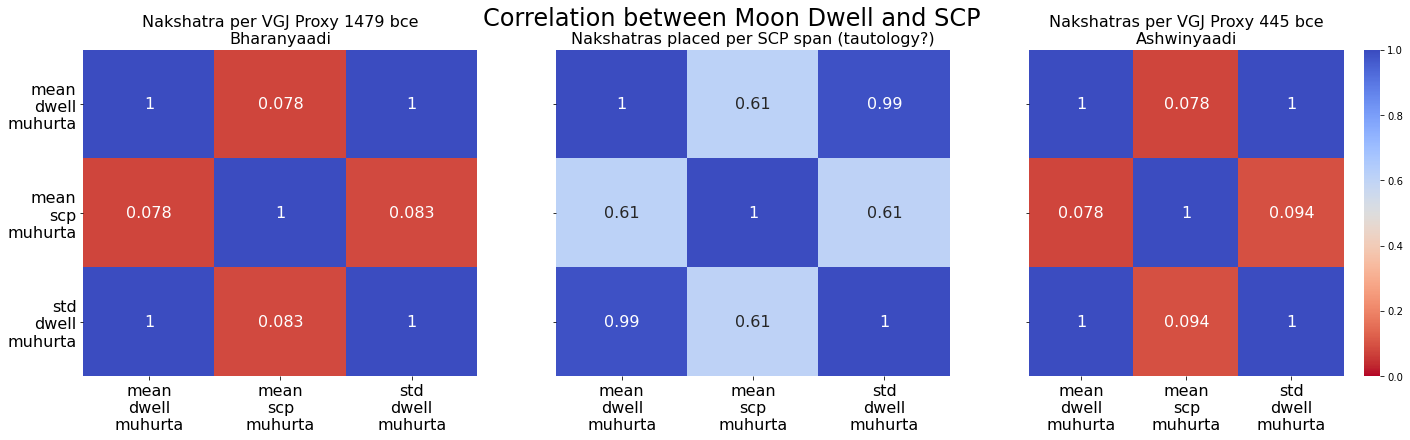

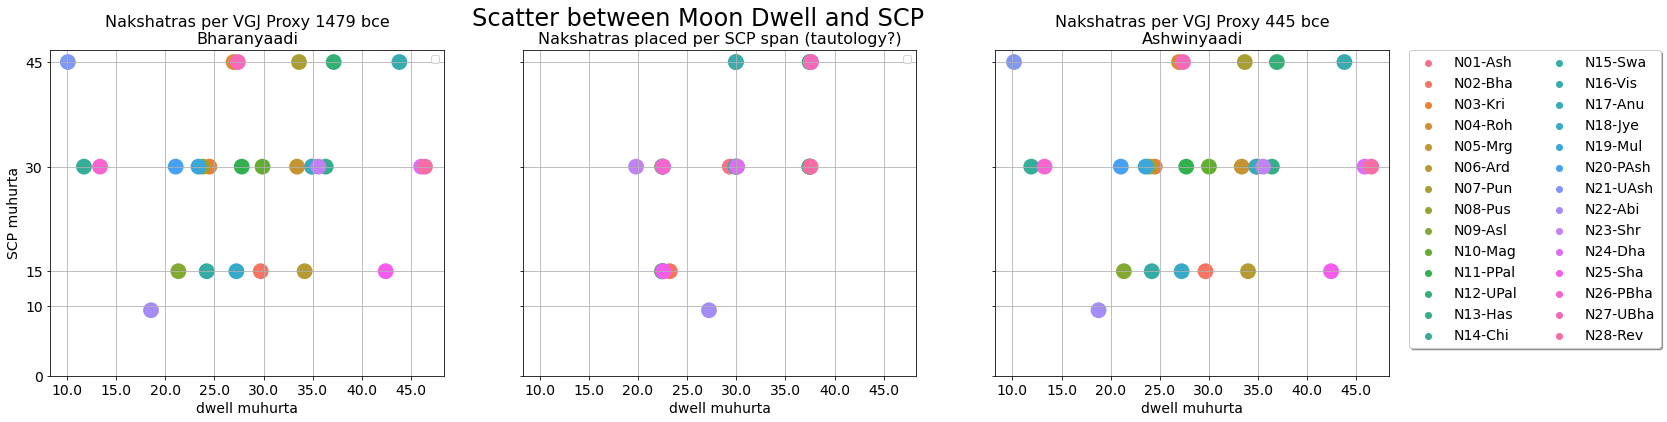

In [10]:
def make_moon_dwell (mdf, ndf,  wrt='left', head=None)  : # moon_positions, naks_spans
	tk = TimeKeeper()

	scoped_mdf = mdf if head == None else mdf.head(head)
	# scoped_mdf.reset_index(inplace=True)
	print(f"{tk.elapsed()} - Start Series boundary - processing {scoped_mdf.shape[0]} rows")
	np_wrt = ndf[wrt].to_numpy()
	boundary = scoped_mdf.apply(lambda x: [ 
		# abs(ndf[wrt]-x.elong_Moon).idxmin(), # leftboundary_idx
		np.abs(np_wrt-x.elong_Moon).argmin(), # leftboundary_idx - faster 4x than above
		x.jd,
		x.elong_Moon,
		x.phase_Moon,	
		], axis=1)
	print(f"{tk.elapsed()} - Start Dataframe boundary")
	mdf_boundary_cross = pd.DataFrame(boundary.tolist())
	mdf_boundary_cross.columns = ['idx', 'jd', 'elong_Moon', 'sun_moon_angle']
	mdf_boundary_cross.set_index('idx', inplace=True)

	print(f"{tk.elapsed()} - Start Join mdf+ndf")
	mdf_boundary_cross = mdf_boundary_cross.join(ndf, on='idx', rsuffix='_scp')

	print(f"{tk.elapsed()} - Start Diff1")
	# find how far the moon is from the left boundary
	mdf_boundary_cross = mdf_boundary_cross.assign( 
		diff1 = abs(mdf_boundary_cross.loc[:,wrt] - mdf_boundary_cross.elong_Moon),
	)
	print(f"{tk.elapsed()} - Start Diff2")
	# Differenitate diff1 - to find when moon crosses a boundary longitude - the sign of diff1 changes , diff2 will be 2 after crossing a boundary longitude
	mdf_boundary_cross['diff2'] = mdf_boundary_cross.diff1.diff().apply(lambda x: np.sign(x)).diff()
	mdf_boundary_cross['cross'] = None

	print(f"{tk.elapsed()} - Start Crossing")
	# # Diff2 find the points after the min, this marks the cross point
	mdf_boundary_cross=mdf_boundary_cross.reset_index()
	mdf_boundary_cross.loc[mdf_boundary_cross[mdf_boundary_cross.diff2==2].index -1, 'cross'] = wrt
	mdf_boundary_cross = mdf_boundary_cross[mdf_boundary_cross.cross==wrt].set_index('jd').reset_index().drop(columns=['idx'])

	print(f"{tk.elapsed()} - Start Dwell")
	mdf_boundary_cross['dwell_muhurta'] = -mdf_boundary_cross.jd.diff(periods=-1)*30
	mdf_boundary_cross.dropna(inplace=True)

	return mdf_boundary_cross

def get_moon_dwell ( mdf, ndf,  wrt='left', tag=None, force=False)  : # moon_positions, naks_spans
	if tag is None or tag[0] == '_': 
		return make_moon_dwell ( mdf, ndf,  wrt=wrt, head=1000)

	fn = f"../datasets/moon_dwell_{tag}_{wrt}.csv"
	try :
		if force: 1/0
		return pd.read_csv(fn)
	except Exception as e:
		print(f"{e}\nGenerating {fn}")
		dwell_df = make_moon_dwell ( mdf, ndf,  wrt=wrt)
		dwell_df.to_csv(fn, index=False)
		return dwell_df

def plot_scatter_moon_dwell (dwell_df, ndf, tag, ax) :
	dwell_pvt = dwell_df.pivot_table(index='nid',  values=['scp_muhurta', 'dwell_muhurta'], aggfunc='mean')#.plot(figsize=(10,5))
	dx=dwell_pvt.reset_index()
	sns.scatterplot(data=dx, x="dwell_muhurta", y="scp_muhurta", hue="nid", ax=ax, s=250, edgecolor="none")
	# seaborn correlation heatmap
	# sns.heatmap(dwell_pvt.corr(), annot=True, cmap='coolwarm_r', ax=ax) 
	ax.set_title(f"{tag}", fontsize=16)

def plot_corr_moon_dwell (dwell_df, ndf, tag, ax, cbar=False) :
	dwell_pvt = dwell_df.assign(lon= lambda x: np.round(x.lon,1)).pivot_table(index=['nid', 'proxy', 'lon'],  values=['scp_muhurta', 'dwell_muhurta' ], aggfunc=['mean', 'std'])#.reset_index()#.plot(figsize=(10,5))
	# seaborn correlation heatmap
	dwell_pvt.columns = [re.sub("_","\n",'_'.join(col).strip()) for col in dwell_pvt.columns.values]
	dwell_pvt.drop(columns=['std\nscp\nmuhurta'], inplace=True)
	# dwell_pvt.drop(columns=['std\nspan'], inplace=True)
	# display(dwell_pvt.style.set_precision(1).set_caption(f"<h2>{tag}</h2>"))
	g = sns.heatmap(dwell_pvt.corr(), annot=True, cmap='coolwarm_r', ax=ax, annot_kws={"size":16}, vmin=0,vmax=1, cbar=cbar, ) 
	# print(dir(g))
	g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16)
	g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 16, rotation=0)
	ax.set_title(f"{tag}", fontsize=16)

dwell_1479 = get_moon_dwell (mdf_interpolated, proxy_span_1479_df, wrt='left', tag='proxy_1479', force=False)
dwell_0445 = get_moon_dwell (mdf_interpolated, proxy_span_0445_df, wrt='left', tag='proxy_0445', force=False)
dwell_scp = get_moon_dwell (mdf_interpolated, scp_span_df, wrt='left', tag='scp_span', force=False)

def plot_moon_dwell() :
	fig , axs = plt.subplots(1,3, figsize=(24,6), sharey=True, sharex=True, facecolor='w', edgecolor='k')
	fig.suptitle("Correlation between Moon Dwell and SCP\n\n", fontsize=24)
	axs = axs.flatten()
	plot_corr_moon_dwell(dwell_1479, proxy_span_1479_df, tag='Nakshatra per VGJ Proxy 1479 bce\nBharanyaadi', ax=axs[0])
	plot_corr_moon_dwell(dwell_scp, scp_span_df, tag='Nakshatras placed per SCP span (tautology?)', ax=axs[1])
	plot_corr_moon_dwell(dwell_0445, proxy_span_0445_df, tag='Nakshatras per VGJ Proxy 445 bce\nAshwinyaadi', ax=axs[2], cbar=True)

	fig , axs = plt.subplots(1,3, figsize=(24,6), sharey=True, sharex=True, facecolor='w', edgecolor='k')
	fig.suptitle("Scatter between Moon Dwell and SCP\n\n", fontsize=24)
	axs = axs.flatten()
	plot_scatter_moon_dwell(dwell_1479, proxy_span_1479_df, tag='Nakshatras per VGJ Proxy 1479 bce\nBharanyaadi', ax=axs[0])
	plot_scatter_moon_dwell(dwell_scp, scp_span_df, tag='Nakshatras placed per SCP span (tautology?)', ax=axs[1])
	plot_scatter_moon_dwell(dwell_0445, proxy_span_0445_df, tag='Nakshatras per VGJ Proxy 445 bce\nAshwinyaadi', ax=axs[2])
	axs[0].legend([], loc='best')
	axs[1].legend([], loc='best')
	axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=2, fancybox=True, shadow=True, fontsize=14)
	for ax in axs[:3]:
		ax.set_xlabel('dwell muhurta', fontsize=14)
		ax.set_ylabel('SCP muhurta', fontsize=14)
		ax.set_xticklabels(ax.get_xticks(), fontsize=14)
		ax.set_yticks([0,10,15,30,45])
		ax.set_yticklabels(ax.get_yticks(), fontsize=14)
		ax.grid(True)

def disp_naks_dwell_scp (dwell_df, ndf, tag) :
	df28 = ndf.assign(lon_ = lambda x: x.lon).set_index('lon') #u.df28_good.copy().assign(lon = nu.df28_good[wrt]).set_index('lon')
	dwell_pvt = dwell_df.pivot_table(index='nid',  values=['scp_muhurta', 'dwell_muhurta'], aggfunc=['mean','std'])#.plot(figsize=(10,5))
	dwell_pvt.columns = [re.sub("_","_",'_'.join(col).strip()) for col in dwell_pvt.columns.values]
	df28a = pd.concat([df28.reset_index(), dwell_pvt.reset_index().drop(columns=['nid'])], axis=1).set_index('nid').drop(columns=['lon_', 'mean_scp_muhurta', 'std_scp_muhurta', 'prev_lon', 'next_lon', 'left', 'right' ])

	# df28a.columns = [re.sub("_","\n",'_'.join(col).strip()) for col in df28a.columns.values]
	df28a.columns = [re.sub("_","<br>",col) for col in df28a.columns.values]
	# df28.drop(columns=['std\nscp\nmuhurta'], inplace=True)
	# df28.drop(columns=['std\nspan'], inplace=True)
	return df28a.style.set_precision(1).background_gradient( cmap='RdYlGn', subset=['lon', 'scp<br>muhurta', 'mean<br>dwell<br>muhurta', 'span'] ).set_table_attributes("style='display:inline'").set_caption(f"<h2>{tag}</h2>")

t1 = disp_naks_dwell_scp (dwell_1479, proxy_span_1479_df, tag='Nakshatras per VGJ Proxy 1479 bce\nBharanyaadi')
t2 = disp_naks_dwell_scp (dwell_scp, scp_span_df, tag='Nakshatras placed per SCP span (tautology?)')
t3 = disp_naks_dwell_scp (dwell_0445, proxy_span_0445_df, tag='Nakshatras per VGJ Proxy 445 bce\nAshwinyaadi')

z ="\xa0\xa0\xa0\xa0\xa0\xa0".join([t1._repr_html_(), t2._repr_html_(), t3._repr_html_()])

display(HTML(z))
plot_moon_dwell(); plt.show()


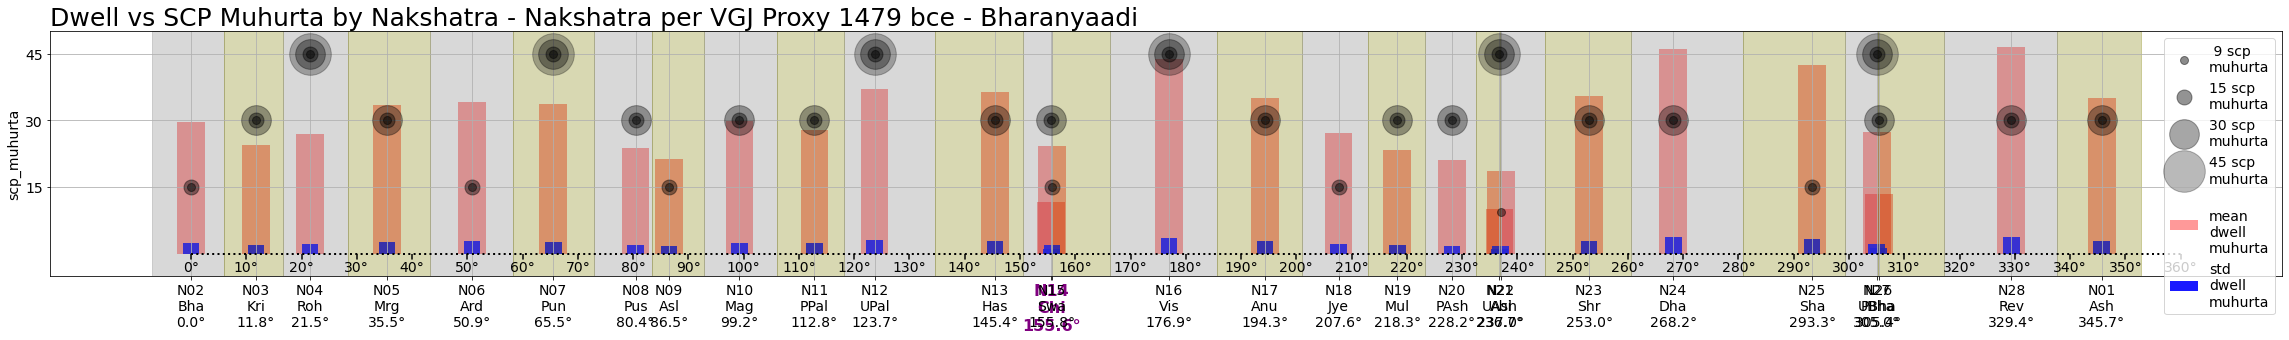

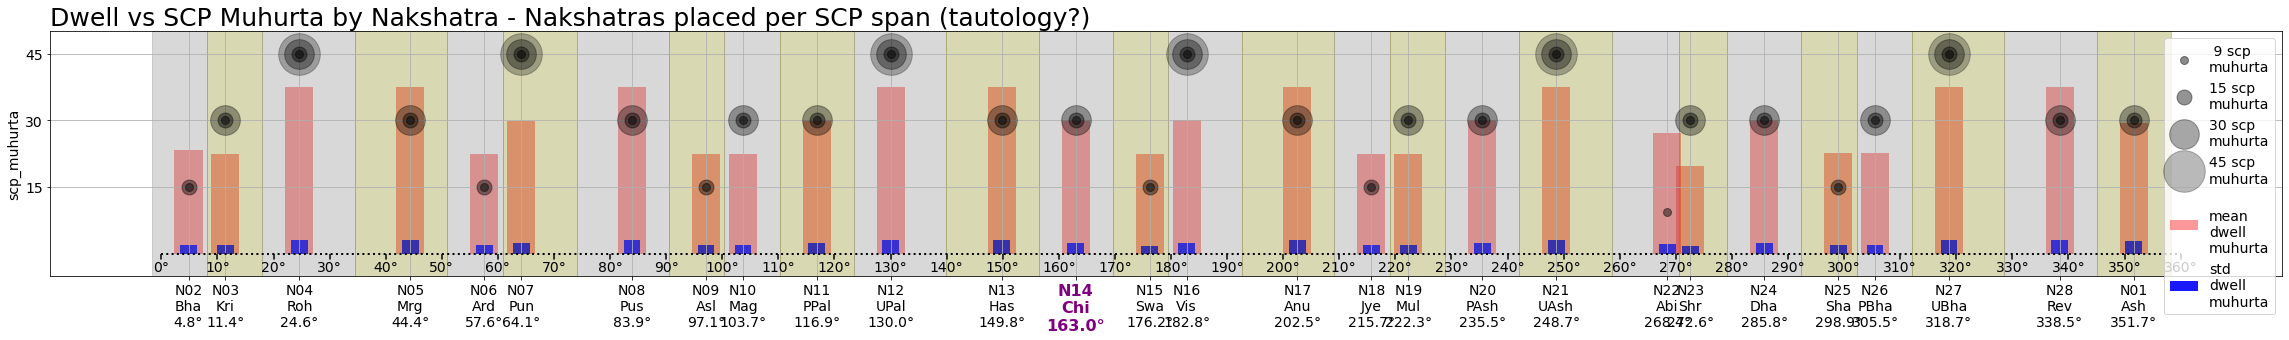

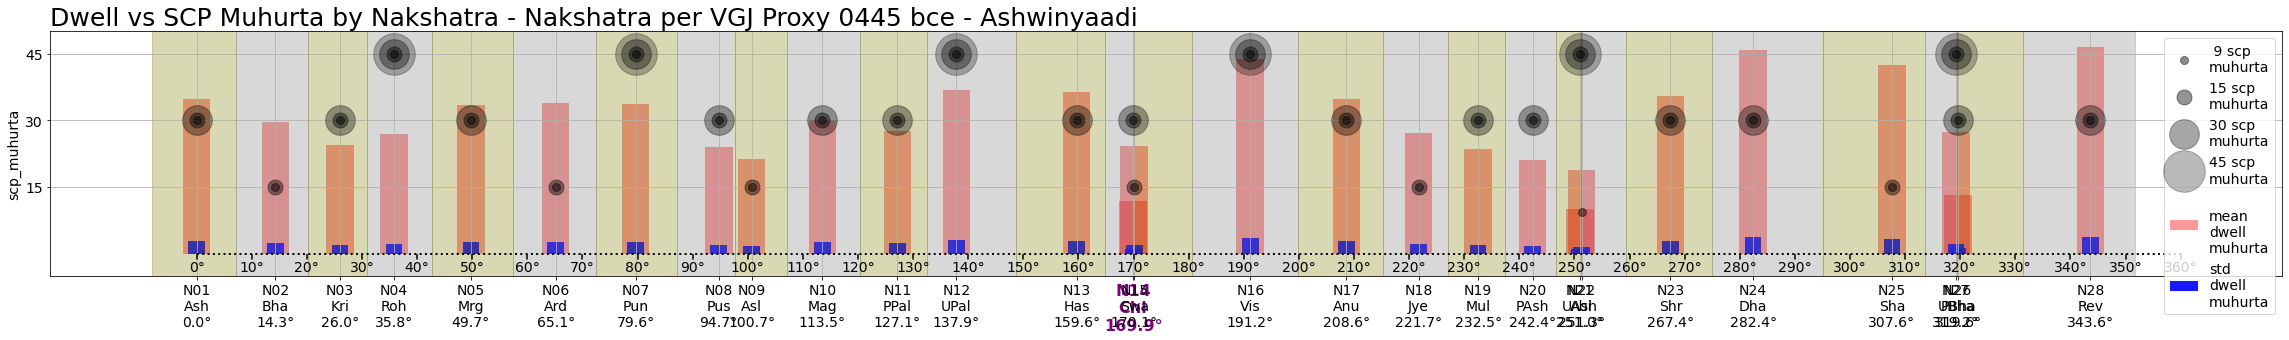

In [11]:
def plot_naks_hist(dwell_df, ndf,tag, ax=None) :
	title=tag
	df28 = ndf.assign(lon_ = lambda x: x.lon).set_index('lon') #u.df28_good.copy().assign(lon = nu.df28_good[wrt]).set_index('lon')
	dwell_pvt = dwell_df.pivot_table(index='nid',  values=['scp_muhurta', 'dwell_muhurta'], aggfunc=['mean','std'])#.plot(figsize=(10,5))
	dwell_pvt.columns = [re.sub("_","_",'_'.join(col).strip()) for col in dwell_pvt.columns.values]
	df28a = pd.concat([df28.reset_index(), dwell_pvt.reset_index()], axis=1).set_index('lon')#.plot(kind='bar', stacked=True, ax=ax, legend=False, title=title, figsize=(10,5))

	if ax is None :
		ax = df28.scp_muhurta.plot(kind='line', figsize=(40,4.5), alpha=0.2, lw=0 , legend=False , label='')
	else :
		ax = df28.scp_muhurta.plot(kind='line', figsize=(40,4.5), alpha=0.2, lw=0, ax=ax, legend=False, label='')
	

	for m , color in zip ( [9,15,30,45], ['pink', 'cyan', 'orange' , 'red'] ) :
		df28_ = df28a[df28a.scp_muhurta > m-1]
		# plt.(df28_.index, df28_.scp_muhurta, width=5, alpha=0.2)
		plt.plot(df28_.index, df28_.scp_muhurta, lw=0, marker='o', markersize=math.log(m,3)**3, alpha=(1-(m/100))/2, color='black', label=f"{m:2d} scp_muhurta".replace('_','\n'))
		# plt.bar(df28_.index, df28_.mean_dwell_muhurta, width=5, alpha=0.4, color= color, label=f"mean_dwell_muhurta")
		# plt.bar(df28_.index, df28_.std_dwell_muhurta, width=3, alpha=0.6, color='blue', label=f"std_dwell_muhurta")
		# plt.plot(df28_.index, df28_.scp_muhurta, lw=0, marker='o', markersize=10)

	plt.bar(df28a.index, df28a.mean_dwell_muhurta, width=5, alpha=0.4, color= color, label=f"\nmean_dwell_muhurta".replace('_','\n'))
	plt.bar(df28a.index, df28a.std_dwell_muhurta, width=3, alpha=0.9, color='blue', label=f"std_dwell_muhurta".replace('_','\n'))
	ax.grid(True)
	ax.set_title(f'Dwell vs SCP Muhurta by Nakshatra - {title}', fontsize=25, loc='left')

	ax.set_xticks(df28.index.values)
	# ax.set_xticklabels( df28.apply(lambda n: (re.sub("\-","\n",n.nid) + f"\n{n.scp_lon_left:.0f}°") if 'Chi' in n.nid else '', axis=1),  rotation=0, fontsize=14) 
	ax.set_xticklabels( df28.apply(lambda n: re.sub("\-","\n",n.nid) + f"\n{n.lon_:.1f}°", axis=1),  rotation=0, fontsize=14);
	ax.get_xticklabels()[13].set_color('purple')
	ax.get_xticklabels()[13].set_fontweight('bold')
	ax.get_xticklabels()[13].set_fontsize(16)
	ax.set_ylim(-5,50)
	ax.set_yticks([15,30,45])
	ax.set_yticklabels([15,30,45], fontsize=14)
	ax.plot([0,360], [0,0], 'k:', lw=2)
	for x in range(0,361,10):
		ax.plot([x,x], [0,-1.5], 'k--', lw=1.5)	
		ax.annotate(f"{x}°", xy=(x, -4.5), xytext=(x, -4.5 + 0*np.random.randint(-10,10)), fontsize=14, ha='center', va='bottom')
	ax.set_xlabel("")
	ax.set_ylabel("scp_muhurta", fontsize=14);
	ax.legend(loc='upper right', fontsize=14)

	for row, ix in zip(df28.iterrows(), range(df28.shape[0])):
		row = row[1]
		ax.add_patch( patches.Rectangle( (row.left if row.left<row.right else (row.left-360) , -10), row.span, 60, alpha=0.3, color= ['olive', 'gray'][ix%2] , ) )

plot_naks_hist(dwell_1479, proxy_span_1479_df, tag='Nakshatra per VGJ Proxy 1479 bce - Bharanyaadi'); plt.show()
plot_naks_hist(dwell_scp, scp_span_df, tag='Nakshatras placed per SCP span (tautology?)'); plt.show()
plot_naks_hist(dwell_0445, proxy_span_0445_df, tag='Nakshatra per VGJ Proxy 0445 bce - Ashwinyaadi'); plt.show()

In [12]:
# fig, axs = plt.subplots(4,7, figsize=(30,15), sharex=not True, sharey=True, gridspec_kw={'hspace': .5, 'wspace': .1})
# axs = axs.flatten()
# fig.suptitle(f"Boxplot of Moon's dwell time in muhurtas by Nakshatra", fontsize=30)
# fig.set_facecolor('#EEEEEE')

# for nid, df_ in mdf_boundary_cross.groupby('nid'):
# 	idx , muhurta = df_.iloc[0].idx_scp, int(df_.iloc[0].muhurta)
# 	# display(df_)
# 	df_['instance'] = range(1,len(df_)+1)
# 	df_['dwell_hours'] = df_.dwell_time.apply(lambda x: round(x*24,0))
# 	df_['dwell_muhurtas'] = df_.dwell_time.apply(lambda x: round(x*30,0))
	
# 	ax = df_[['dwell_muhurtas']].plot(kind='box',  ax=axs[idx], grid=True, legend=not False, color='#006699')
# 	ax.set_title(f"{nid} - {int(muhurta)}" , fontdict={'fontsize':15})
# 	colors = {'45':'cyan', '30':'khaki', '15':'silver'}
# 	color = colors[str(muhurta)] if str(muhurta) in colors else  '#ff00ff' 
# 	ax.set_facecolor(color)
# 	# ax.set_xlabel(f"", fontdict={'fontsize':12, 'color':'blue'})
# 	# ax.set_xticks(np.arange(0,51,5))
# 	# ax.set_xticklabels(np.arange(0,51,5), fontdict={'fontsize':12, 'color':'blue'})


### Explore longitude diff at Full Moon between Moon and other Gruhas <a class="anchor" id="ld_m_g"></a>
[top](#top_)

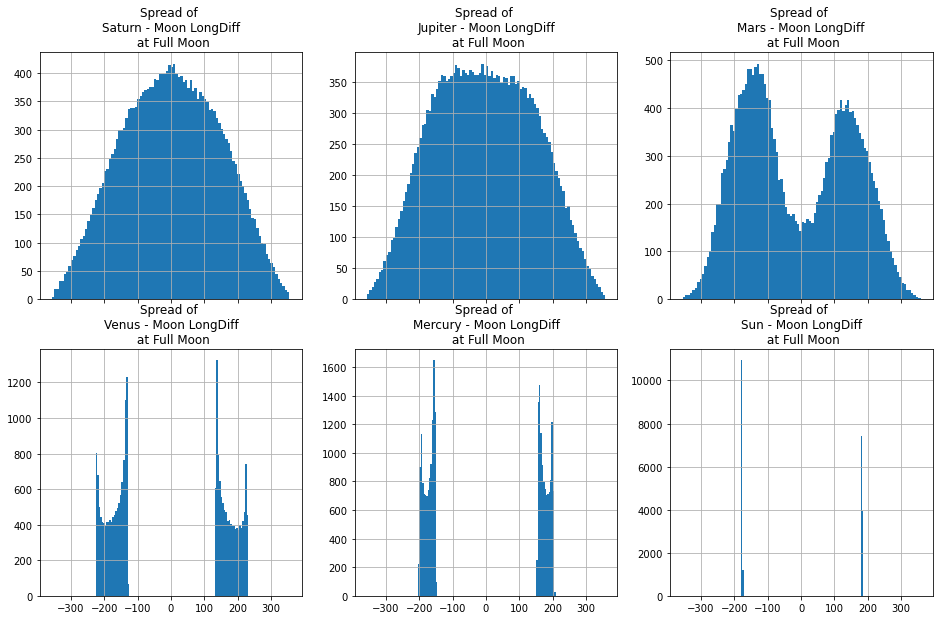

In [13]:
nmsu.plot_moon_gruha_long_diff_hist()

### Explore Relation of Full Moon to Maasa Names <a class="anchor" id="fm_mn"></a>  
[top](#top_)

- Count the frequency of super moons by nakshatra for a given series of epochs

- The epoch where nakshatras yielding maasa names have higher frequency is a candidate epoch for maasa names

- Couple of candidate epoch are shown below most nakshatra maasa have higher than mean super moons


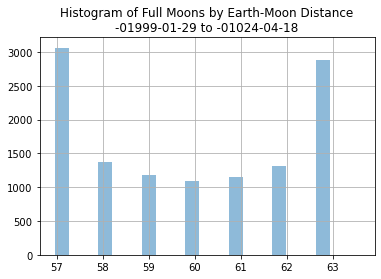

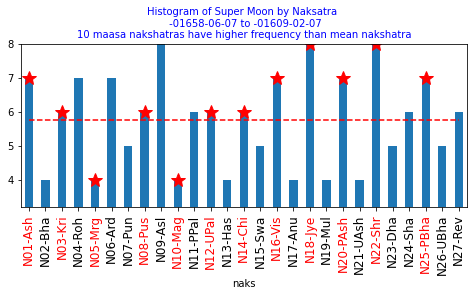

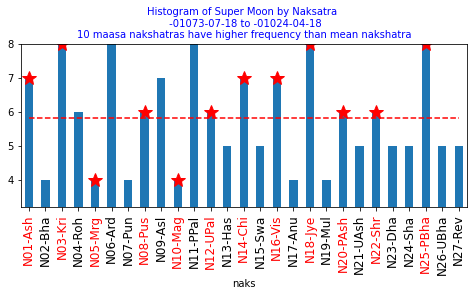

,date,step,mean_all_naks,mean_maasa_naks,mean_not_maasa_naks,num_maasas_above_mean_all,num_not_maasas_above_mean_all,match_metric
0,-01975,1,5.52,6.17,5.00,8,1,11.33
1,-01926,2,5.70,5.25,6.07,4,8,0.71
2,-01877,3,5.56,5.83,5.33,8,7,1.62
3,-01829,4,5.67,5.17,6.07,5,10,0.71
4,-01780,5,5.89,5.75,6.00,6,8,1.06
5,-01731,6,5.33,5.58,5.13,6,6,1.42
6,-01682,7,5.78,5.58,5.93,6,9,0.94
7,-01634,8,5.78,6.33,5.33,10,3,4.72
8,-01585,9,5.59,5.42,5.73,5,9,0.79
9,-01536,10,5.70,5.75,5.67,5,7,1.01


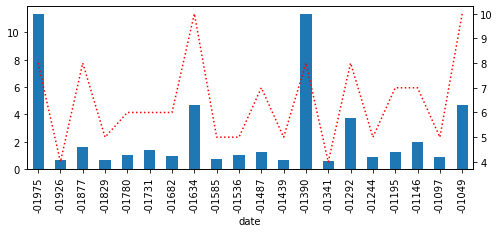

In [14]:
nmsu.super_moon_histogram_by_epoch()

### Mars and Moon Parvas <a class="anchor" id="Mars_and_Moon_Parvas"></a> 
[top](#top_)

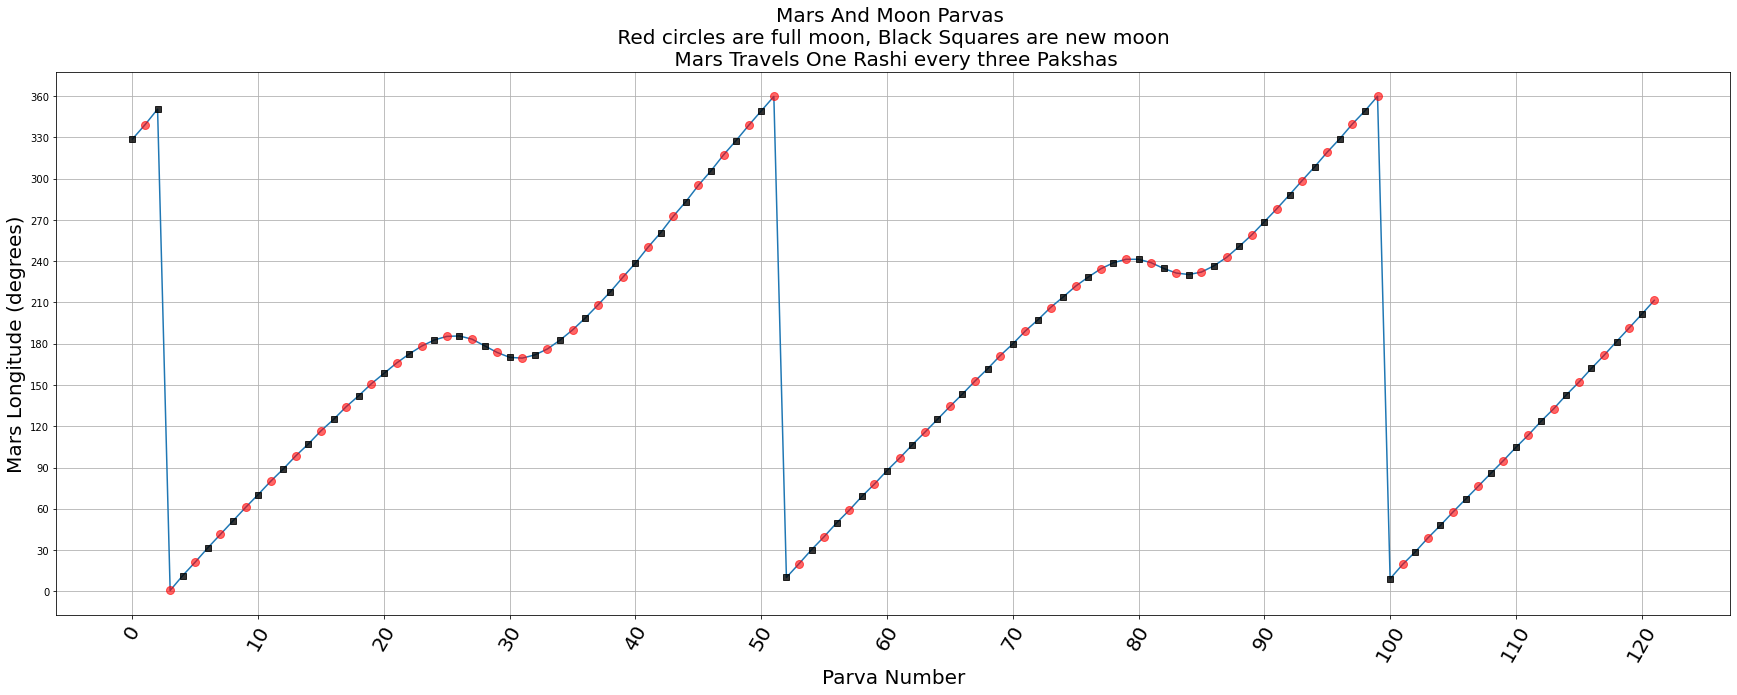

In [15]:
import PlanetPos
import pandas as pd
import numpy as np
import re
pp = PlanetPos.PlanetPos( slice= ['Moon', 'Sun' ,'Mars'])
jd_start = PlanetPos.JD_BCE_1000_JAN_1
nyears = 5
fn = f'mar_{nyears}~.pkl'
fn = f'../datasets/{fn}'
try :
	# 1/0
	mars_yrs = pd.read_pickle(fn)
except Exception as e:
	print(e)
	mars_yrs = pd.concat( [pp.get_planet_pos(jd) for jd in np.arange(jd_start, jd_start+366*nyears, 1/6)])#.plot(figsize=(20,10))
	mars_yrs.to_pickle(fn)

marspvt = mars_yrs.pivot_table(index=['jd', 'date'], columns='planet', values='elong').reset_index()#.set_index('jd')#.plot(figsize=(20,10))
marspvt.date = marspvt.date.apply(lambda x: re.sub(":\d\d\.\d\d\d","",x))
marspvt['moon_phase'] = (marspvt.Sun - marspvt.Moon)%360
marspvt['mars_direction'] = np.sign(marspvt.Mars.diff()).apply(lambda x: 1 if x == 1.0 else -1)
delta=1.1
fm = marspvt[ [ (180-delta)<x<(180+delta) for x in marspvt.moon_phase] ].jd.diff() 
nm = marspvt[marspvt.moon_phase < 2.2].jd.diff()
fm = fm[fm>1]
nm = nm[nm>1]
fm =-fm
nfm = fm.copy().append(nm).sort_index()
parvas = marspvt.loc[nfm.index]
parvas['moon_parva'] = [ int(x) for x in (-np.sign(nfm.values)+1)/2]
parvas['parva_diff'] = parvas.jd.diff()
parvas = parvas[parvas.mars_direction > -2].reset_index()
pd.options.display.float_format = '{:.2f}'.format
ax=parvas.Mars.plot(figsize=(30,10))
parvas[parvas.moon_parva == 1].Mars.plot(ax=ax, marker='o', markersize=8, color='red', alpha=0.6, lw=0)
parvas[parvas.moon_parva != 1].Mars.plot(ax=ax, marker='s', color='black', alpha=0.8, lw=0)

ax.set_title('Mars And Moon Parvas \n Red circles are full moon, Black Squares are new moon \n Mars Travels One Rashi every three Pakshas', fontdict={'fontsize':20})
ax.set_xlabel('Parva Number', fontdict={'fontsize':20})
ax.set_ylabel('Mars Longitude (degrees)',fontdict={'fontsize':20})
ax.set_xticks(np.arange(0,parvas.shape[0],10))
ax.set_xticklabels(np.arange(0,parvas.shape[0],10), rotation=60, fontsize=20)
ax.set_yticks(np.arange(0,361,30))
ax.grid(True)




In [16]:
!rm ./cahc_explore.html 2>/dev/null
!date

Sat Jan 22 01:28:31 IST 2022


In [17]:
!~/anaconda3/bin/jupyter nbconvert cahc_explore.ipynb --to html --no-input --output  cahc_explore.html 2>&1 | tee ~/tmp/nbconvert.log
!open ./cahc_explore.html

[NbConvertApp] Converting notebook cahc_explore.ipynb to html
[NbConvertApp] Writing 2808690 bytes to cahc_explore.html
